# Relaxation Assignment
## The Stokes Flow

##### Laurent Pétré & Ilan Renous

In this assignment, we are going to use the Jacobi method to solve a system of a Laplace equation coupled with a Poisson equation. This system of equations can describe the fluid flow in a lid-driven cavity at very low Reynolds numbers. 

In [16]:
# We import the libraries we will need
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

## The Stokes Flow

The non-dimensional Navier-Stokes equation is given as

\begin{equation}
Re \left(\frac{\partial u}{\partial t} + u \cdot \nabla u \right) = -\nabla p + \nabla^2 u
\end{equation}

Where $u$ and $p$ are the non-dimensional velocity and pressure, respectively.  

To obtain a Stokes flow, we assume that the Reynolds $Re$ number approaches zero.  Applying that assumption yields

\begin{equation}
0 = - \nabla p + \nabla^2 u
\end{equation}

Now, we apply the curl operator on both sides of the equation to obtain:

\begin{equation}
0 = \nabla \times - \nabla p = - \nabla \times \nabla^2 u = - \nabla^2\omega
\end{equation}

where $\nabla \times u = \omega$ is the vorticity.  

The LHS of the equation being zero, we arrive at the simplified vorticity transport equation for Stokes flow:

\begin{equation}
\nabla ^2 \omega = 0
\end{equation}

### Stream function

Define the stream function $\psi$, such that

\begin{equation}
u = \frac{\partial \psi}{\partial y} \text{   and   } v = - \frac{\partial \psi}{\partial x}
\end{equation}

where u is the x-component and v the y-component of the fluid speed. 

In 2D, we can write out the vorticity as

\begin{equation}
\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{equation}

which, combined with the previous equation yields another familiar looking equation:

\begin{equation}
\nabla^2 \psi = -\omega
\end{equation}

We have a system of two coupled equations that can describe the fluid flow in a lid-driven cavity at very low Reynolds numbers.  

\begin{equation}
\nabla^2 \omega = 0
\end{equation}

\begin{equation}
\nabla^2 \psi = -\omega
\end{equation}

### Discretisation of the equations

The **Poisson equation** for a 2D function f with a source term b can be written as : 

$$\frac{\partial ^2 f}{\partial x^2} + \frac{\partial ^2 f}{\partial y^2} = b$$

In discretized form, this equation become:

$$\frac{f_{i+1,j}^{k}-2f_{i,j}^{k}+f_{i-1,j}^{k}}{\Delta x^2}+\frac{f_{i,j+1}^{k}-2 f_{i,j}^{k}+f_{i,j-1}^{k}}{\Delta y^2}=b_{i,j}^{k}$$

We rearrange this to obtain an equation for $f$ at point $i,j$, based on its neighbors: 

$$f_{i,j}^{k+1}=\frac{(f_{i+1,j}^{k}+f_{i-1,j}^{k})\Delta y^2+(f_{i,j+1}^{k}+f_{i,j-1}^{k})\Delta x^2-b_{i,j}^{k}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

When the term b is set to zero, we get the Laplace equation.

This is called the Jacobi method and $f_{i,j}^{k+1}$ converges towards the solution to the poisson equation.

Our system in a discret form is thus:

$$\omega_{i,j}^{k+1}=\frac{(\omega_{i+1,j}^{k}+\omega_{i-1,j}^{k})\Delta y^2+(\omega_{i,j+1}^{k}+\omega_{i,j-1}^{k})\Delta x^2}{2(\Delta x^2+\Delta y^2)}$$

$$\psi_{i,j}^{k+1}=\frac{(\psi_{i+1,j}^{k}+\psi_{i-1,j}^{k})\Delta y^2+(\psi_{i,j+1}^{k}+\psi_{i,j-1}^{k})\Delta x^2-\omega_{i,j}^{k}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

We can solve this system by evaluating $\omega_{i,j}^{k+1} $ at each iteration and us it value to evaluate $\psi_{i,j}^{k+1}$. We stop the iteration when a certain type of norm between $\psi_{i,j}^{k}$ and $\psi_{i,j}^{k+1}$ is smaller than a chosen value.

## Boundary conditions

We will solve the lid-driven cavity flow problem. 
We assume that the lid of a square cavity moves at a constant velocity of $u=1$, with no fluid leaking out past the moving lid. 

All of the surfaces, including the lid, are assumed to have no-slip boundary conditions.  The boundary conditions are all specified in terms of the streamfunction $\psi$, as shown below in Figure $(1)$.  

<img src="../../lessons/05_relax/figures/drivencavity.svg" width=400px>

The boundary conditions are all specified in terms of $\psi$ and its derivatives, but the Laplace equation

$$\nabla \omega^2 = 0$$

has no $\psi$ value.  Instead, we need a way to represent the boundary conditions for $\omega$ in terms of $\psi$.  

Along the top surface of the cavity (the moving surface). 
There can't be any velocity in the $y$-direction because the surface is solid, so $\frac{\partial ^2 \psi}{\partial x^2}$ goes to zero and the equation simplifies to

\begin{equation}
\frac{\partial ^2 \psi}{\partial y^2} = -\omega
\end{equation}

A 2nd-order central difference discretization gives

\begin{equation}
\omega_j = - \left(\frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta y^2}\right)
\end{equation}

but the value $\psi_{j+1}$ is outside of the domain.  Now take a 3rd-order discretization of $\frac{\partial \psi}{\partial y}$ evaluated along the top edge.

\begin{equation}
\left.\frac{\partial \psi}{\partial y}\right|_j = \frac{2\psi_{j+1} + 3\psi_j - 6\psi_{j-1} + \psi_{j-2}}{6 \Delta y}
\end{equation}

$\frac{\partial \psi}{\partial y}$ is a given boundary value in the problem along the top edge

\begin{equation}
\left.\frac{\partial \psi}{\partial y}\right|_j = u
\end{equation}

which leaves us with a value for $\psi_{j+1}$ that consists only of points within the domain.  

\begin{equation}
\psi_{j+1} = \frac{6\Delta y u_j - 3\psi_j + 6 \psi_{j-1} - \psi_{j-2}}{2}
\end{equation}

Plug in that result into the initial discretization from Equation $(16)$ and we have a boundary condition for $\omega$ along the top surface in terms of $\psi$:

\begin{equation}
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j-1}- 7\psi_{i, j} - \psi_{i, j-2}) - \frac{3u_j}{\Delta y} + \mathcal{O}(\Delta y^2)
\end{equation}

Since there is no flow through the cavity surface ,$\psi_{i, j}$ needs to be constant on these surfaces. This constant is chosen to be zero.

we thus get along the top surface:

\begin{equation}\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j-1} - \psi_{i, j-2}) - \frac{3u}{\Delta y}
\end{equation}

along the bottom surface this becomes:

\begin{equation}\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j+1} - \psi_{i, j+2})
\end{equation}

along the left surface:

\begin{equation}\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i+1, j} - \psi_{i+2, j})
\end{equation}

and along the right surface:

\begin{equation}\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i-1, j} - \psi_{i-2, j})
\end{equation}



## Implementation

We can now implement those equations. The boundary conditions need to be applied at each itterations. In Python that gives us :

In [17]:
def solve(psi_i, omega_i, dx, dy, norm_func, norm_target,u):
    """
    Compute the solution of the partial differential system : 
        - du/dt = Du*(div(grad(u)) + G1(u, v)
        - dv/dt = Dv*(div(grad(v)) + G2(u, v).

    Parameters
    ----------
    psi_i, omega_i: array[NxN] of floats
        initial conditions

    dx, dy: float
        space steps

    nt: integer
        number of iterations

    norm_func: function of 2 arrays[NxN] of floats
        computes the norm between two iterations

    norm_target: float
        norm between two iteration needed to stop the computation

    Returns
    -------
    psi, omega: array[NxN]
        solution of the system
    """
    
    # We don't want to modify the input parameters
    psi = psi_i.copy()
    omega = omega_i.copy()

    # Initial norms for psi and omega
    normp = 1
    normo = 1

    while ((normp > norm_target) or (normo > norm_target)):
        # Omega computation
        omegan = omega.copy()

        omega[1:-1,1:-1] = .25 * (omegan[1:-1,2:] + omegan[1:-1, :-2] \
                + omegan[2:, 1:-1] + omegan[:-2, 1:-1])

        # Bcs
        omega[-1, :] = (-1/(2*dy**2))*(8*psi[-2, :] - psi[-3, :]) \
                - (3*u)/dy # Top
        omega[0, :] = (-1/(2*dy**2))*(8*psi[1, :] - psi[2, :]) # Bottom
        omega[:, -1] = (-1/(2*dx**2))*(8*psi[:, -2] - psi[:, -3]) # Left
        omega[:, 0] = (-1/(2*dx**2))*(8*psi[:, 1] - psi[:, 2]) # Right

        # Psi computation
        psid = psi.copy()

        psi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * ( \
                (psid[1:-1,2:]+psid[1:-1,:-2])*dy**2 + \
                (psid[2:,1:-1] + psid[:-2,1:-1])*dx**2 + \
                omega[1:-1,1:-1]*dx**2*dy**2)

        # BCs automatically satisfied

        normp = norm_func(psid, psi)
        normo = norm_func(omega, omegan)

    return psi, omega

## Solve !

We created the function needed to solve this problem, all we need now is initial conditions and simulation parameters. Let's choose the following parameters :

* Grid of points with dimension `41x41` points
* Domain is $l=1 \times h=1$
* L1 target $=10^{-6}$, the chosen norm between $\psi_{i,j}^{k}$ and $\psi_{i,j}^{k+1}$ 


In [18]:
# Space conditions
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

# Convergence conditions
def l1_norm(new, old):
    return numpy.sum(numpy.abs(new - old))

norm_target = 1e-6

#speed
u=1

# Initial conditions
psi = numpy.zeros((nx, ny))
omega = numpy.zeros((nx, ny))

Now, it's time to launch the simulation :

In [19]:
# Solve
psi, omega = solve(psi, omega, dx, dy, l1_norm, norm_target,u)

# Output
print(numpy.amax(numpy.abs(psi)))
print(numpy.amax(numpy.abs(omega)))
print(numpy.round(psi[32,::8], 4))

0.0998451724383
78.1926612286
[ 0.     -0.0575 -0.0944 -0.0944 -0.0575  0.    ]


Those values are the same that the one given online. Good news!

## Drawing

We will draw a contour plot of the stream function to see the look of the flow.

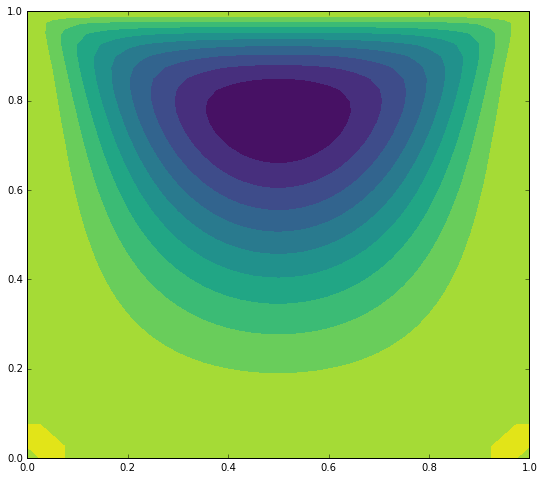

In [29]:
# Axes helpers
x = numpy.linspace(0, l, nx)
y = numpy.linspace(0, h, ny)

# Figure
pyplot.figure(figsize=(9,8))
pyplot.contourf(x,y,psi,10,cmap=cm.viridis)

It looks like a vortex! To be sure, we can find, from the stream function, the speed of the fluid and then plot it.

0.00053535312832


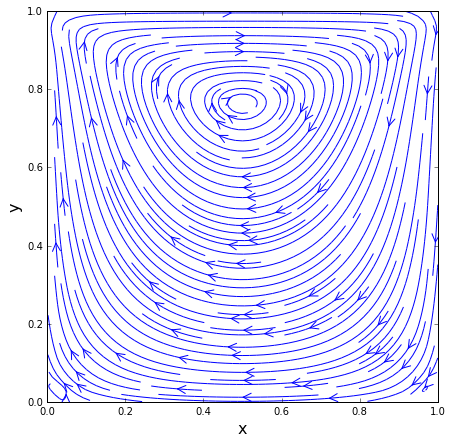

In [35]:
def speed(psi,nx,ny,dx,dy,u):
    '''calculate the speed from the potential
    
    Parameters:
    ----------
    psi : 2D array of floats
        potential
    nx: float
        array size x axis
    ny:float
        array size y axis
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    
    Returns:
    -------
    ux: 2D array of float
        speed in the x direction
    vy:2D array of float
        speed in the y direction
    ''' 
    ux=numpy.zeros((nx,ny))
    vy=numpy.zeros((nx,ny))
    
    ux[:,0]=0
    ux[:,-1]=0
    ux[0,:]=0
    ux[-1,:]=u
    ux[1:-1,1:-1]=(1/2*dy)*(psi[2:,1:-1]-psi[0:-2,1:-1])
    
    vy[:,0]=0
    vy[:,-1]=0
    vy[0,:]=0
    vy[-1,:]=0
    vy[1:-1,1:-1]=-(1/2*dx)*(psi[1:-1,2:]-psi[1:-1,0:-2])
    
    return ux,vy

#plot of the flow speed
ux, vy=speed(psi,nx,ny,dx,dy,u)
X, Y =numpy.meshgrid(x,y)
size=7

pyplot.figure(figsize=(size, (y[-1]-y[0])/(x[-1]-x[0])*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x[0],x[-1])
pyplot.ylim(y[0], y[-1])
pyplot.streamplot(X, Y, ux, vy, density=1.86, linewidth=1, arrowsize=2, arrowstyle='->')

print(ux[-2,20])

## Conclusion

It is intersting to see that any stokes flow system can be soled by the same equations. The only thing that are going to change the final solution is the boundaries conditions.


##### Source

(1) We used the following lectures https://github.com/numerical-mooc/numerical-mooc available under Creative Commons Attribution license CC-BY 4.0, (c)2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan.

---
###### The cell below loads the style of this notebook. 

In [22]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())